In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

# Loading audio files
출처 : https://www.youtube.com/watch?v=8UJ8ZDR7yUs

In [2]:
file1 = '../../nmb_data/teamvoice/testvoice_F2.wav'
file2 = '../../nmb_data/teamvoice/testvoice_F1.wav'
file3 = '../../nmb_data/teamvoice/testvoice_M2.wav' 

In [6]:
# load audio files with librosa
debussy, sr = librosa.load(file1)
redhot, _ = librosa.load(file2)
duke, _ = librosa.load(file3)

print(debussy.shape)

(110250,)


# Extract spectrograms

In [4]:
FRAME_SIZE = 2048
HOP_SIZE = 512

debussy_spec = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
redhot_spec = librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
duke_spec = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

print(debussy_spec.shape)
print(redhot_spec.shape)
print(duke_spec.shape)

(1025, 216)
(1025, 216)
(1025, 216)


# Calculate Band Energy Ratio

In [7]:
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin) # math.floor : 내림
    return int(split_frequency_bin)

In [8]:
split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
split_frequency_bin

185

In [11]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T # (a, b) -> (b, a)
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

In [13]:
ber_debussy = band_energy_ratio(debussy_spec, 2000, sr)
ber_redhot = band_energy_ratio(redhot_spec, 2000, sr)
ber_duke = band_energy_ratio(duke_spec, 2000, sr)

print(len(ber_debussy))

216


# Visualise Band Energy Ratio

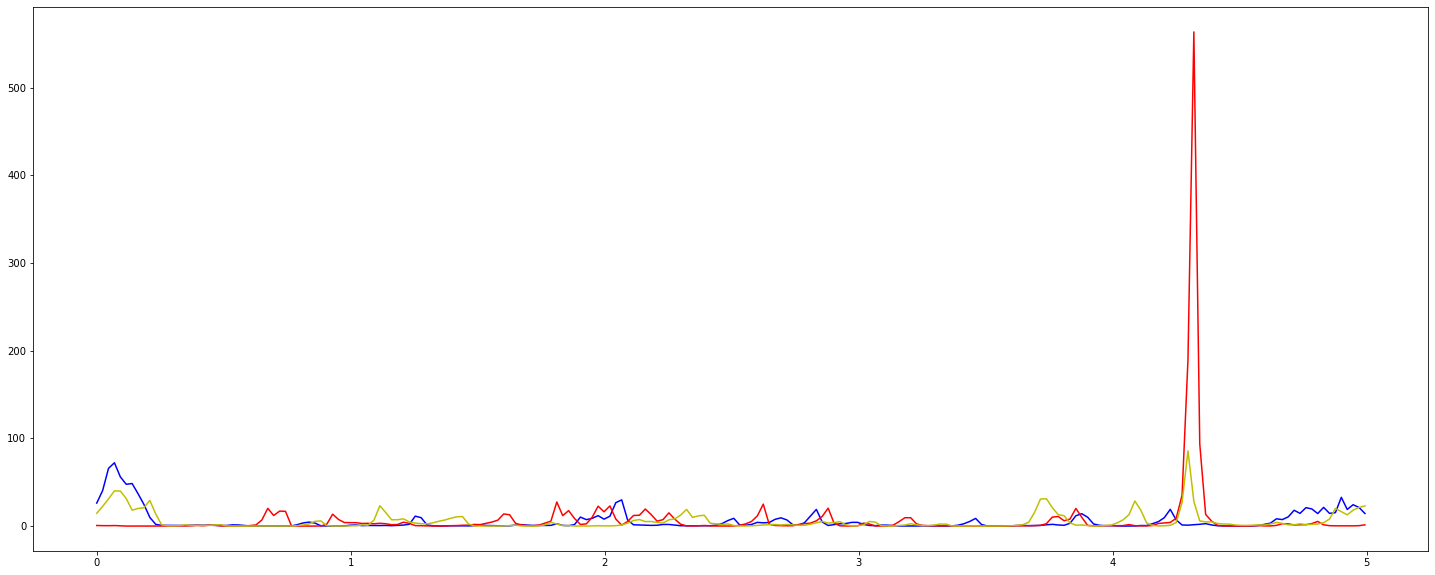

In [18]:
frames = range(len(ber_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

plt.figure(figsize=(25, 10))

plt.plot(t, ber_debussy, color="b")
plt.plot(t, ber_redhot, color="r")
plt.plot(t, ber_duke, color="y")
# plt.ylim((0, 800))
plt.show()

# x:time
# y:Band Energy Ratio